In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving patients.csv to patients.csv
Saving treatments.csv to treatments.csv
Saving doctors.csv to doctors.csv
Saving billing.csv to billing.csv
Saving appointments.csv to appointments.csv


In [ ]:
import pandas as pd
patients = pd.read_csv("patients.csv")
treatments= pd.read_csv("treatments.csv")
doctors= pd.read_csv("doctors.csv")
billing= pd.read_csv("billing.csv")
appointments= pd.read_csv("appointments.csv")
#patients.head(),treatments.head(),doctors.head(),billing.head(),appointments.head()


In [ ]:
print(patients.columns)
print(appointments.columns)
print(doctors.columns)
print(treatments.columns)
print(billing.columns)


Index(['patient_id', 'first_name', 'last_name', 'gender', 'date_of_birth',
       'contact_number', 'address', 'registration_date', 'insurance_provider',
       'insurance_number', 'email'],
      dtype='object')
Index(['appointment_id', 'patient_id', 'doctor_id', 'appointment_date',
       'appointment_time', 'reason_for_visit', 'status'],
      dtype='object')
Index(['doctor_id', 'first_name', 'last_name', 'specialization',
       'phone_number', 'years_experience', 'hospital_branch', 'email'],
      dtype='object')
Index(['treatment_id', 'appointment_id', 'treatment_type', 'description',
       'cost', 'treatment_date'],
      dtype='object')
Index(['bill_id', 'patient_id', 'treatment_id', 'bill_date', 'amount',
       'payment_method', 'payment_status'],
      dtype='object')


In [ ]:

# We need to join different datasets
# 1. appointments + patients
appt_pat = appointments.merge(
    patients,
    on="patient_id",
    how="left",
    suffixes=("", "_patient")
)

# 2. add doctor information
appt_pat_doc = appt_pat.merge(
    doctors,
    on="doctor_id",
    how="left",
    suffixes=("", "_doctor")
)

# 3. add treatments
appt_pat_doc_treat = appt_pat_doc.merge(
    treatments,
    on="appointment_id",
    how="left",
    suffixes=("", "_treatment")
)

# 4. add billing (join on patient + treatment)
full_df = appt_pat_doc_treat.merge(
    billing,
    on=["patient_id", "treatment_id"],
    how="left",
    suffixes=("", "_billing")
)

print("Final unified dataset shape:", full_df.shape)
full_df.head()


Final unified dataset shape: (200, 34)


,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status,first_name,last_name,gender,...,treatment_id,treatment_type,description,cost,treatment_date,bill_id,bill_date,amount,payment_method,payment_status
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,Alex,Smith,F,...,T001,Chemotherapy,Basic screening,3941.97,2023-08-09,B001,2023-08-09,3941.97,Insurance,Pending
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show,Alex,Moore,M,...,T002,MRI,Advanced protocol,4158.44,2023-06-09,B002,2023-06-09,4158.44,Insurance,Paid
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled,Emily,Miller,M,...,T003,MRI,Standard procedure,3731.55,2023-06-28,B003,2023-06-28,3731.55,Insurance,Paid
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled,Robert,Wilson,M,...,T004,MRI,Basic screening,4799.86,2023-09-01,B004,2023-09-01,4799.86,Insurance,Failed
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show,Emily,Williams,M,...,T005,ECG,Standard procedure,582.05,2023-07-06,B005,2023-07-06,582.05,Credit Card,Pending


In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   appointment_id      200 non-null    object 
 1   patient_id          200 non-null    object 
 2   doctor_id           200 non-null    object 
 3   appointment_date    200 non-null    object 
 4   appointment_time    200 non-null    object 
 5   reason_for_visit    200 non-null    object 
 6   status              200 non-null    object 
 7   first_name          200 non-null    object 
 8   last_name           200 non-null    object 
 9   gender              200 non-null    object 
 10  date_of_birth       200 non-null    object 
 11  contact_number      200 non-null    int64  
 12  address             200 non-null    object 
 13  registration_date   200 non-null    object 
 14  insurance_provider  200 non-null    object 
 15  insurance_number    200 non-null    object 
 16  email   

**Descriptive** **statistics**


In [ ]:

full_df.describe()

,contact_number,phone_number,years_experience,cost,amount
count,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000
mean,7.860191e+09,7.993392e+09,21.520000,2756.249250,2756.249250
std,9.421779e+08,1.091853e+09,5.920716,1298.125308,1298.125308
min,6.141952e+09,6.176384e+09,5.000000,534.030000,534.030000
25%,7.081397e+09,6.594222e+09,19.000000,1563.412500,1563.412500
50%,7.765391e+09,8.322010e+09,23.000000,2828.165000,2828.165000
75%,8.618059e+09,9.004382e+09,26.000000,3836.627500,3836.627500
max,9.900972e+09,9.118539e+09,28.000000,4973.630000,4973.630000


**No Null values found**

In [ ]:
full_df.isnull()

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status,first_name,last_name,gender,...,treatment_id,treatment_type,description,cost,treatment_date,bill_id,bill_date,amount,payment_method,payment_status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Duplicate checking**

In [ ]:
for name, df in full_df.items():
    print(f"\nDuplicates in {name}: {df.duplicated().sum()}")



Duplicates in appointment_id: 0

Duplicates in patient_id: 152

Duplicates in doctor_id: 190

Duplicates in appointment_date: 42

Duplicates in appointment_time: 160

Duplicates in reason_for_visit: 195

Duplicates in status: 196

Duplicates in first_name: 190

Duplicates in last_name: 190

Duplicates in gender: 198

Duplicates in date_of_birth: 153

Duplicates in contact_number: 152

Duplicates in address: 196

Duplicates in registration_date: 152

Duplicates in insurance_provider: 196

Duplicates in insurance_number: 152

Duplicates in email: 163

Duplicates in first_name_doctor: 194

Duplicates in last_name_doctor: 194

Duplicates in specialization: 197

Duplicates in phone_number: 190

Duplicates in years_experience: 192

Duplicates in hospital_branch: 197

Duplicates in email_doctor: 190

Duplicates in treatment_id: 0

Duplicates in treatment_type: 195

Duplicates in description: 197

Duplicates in cost: 0

Duplicates in treatment_date: 42

Duplicates in bill_id: 0

Duplicates in

From above, duplicates in many cases can be acceptable but not a few like appointment_id,treatment_id and bill_id and these three have no duplicates

In [ ]:
for name, df in full_df.items():
    print(f"\nDuplicate rows in {name}: {df.duplicated().sum()}")



Duplicate rows in appointment_id: 0

Duplicate rows in patient_id: 152

Duplicate rows in doctor_id: 190

Duplicate rows in appointment_date: 42

Duplicate rows in appointment_time: 160

Duplicate rows in reason_for_visit: 195

Duplicate rows in status: 196

Duplicate rows in first_name: 190

Duplicate rows in last_name: 190

Duplicate rows in gender: 198

Duplicate rows in date_of_birth: 153

Duplicate rows in contact_number: 152

Duplicate rows in address: 196

Duplicate rows in registration_date: 152

Duplicate rows in insurance_provider: 196

Duplicate rows in insurance_number: 152

Duplicate rows in email: 163

Duplicate rows in first_name_doctor: 194

Duplicate rows in last_name_doctor: 194

Duplicate rows in specialization: 197

Duplicate rows in phone_number: 190

Duplicate rows in years_experience: 192

Duplicate rows in hospital_branch: 197

Duplicate rows in email_doctor: 190

Duplicate rows in treatment_id: 0

Duplicate rows in treatment_type: 195

Duplicate rows in descri

In [ ]:
df = df.drop_duplicates()


In [ ]:
patients['gender'].value_counts()


,count
gender,
M,31
F,19


In [ ]:
doctors["specialization"].value_counts()


,count
specialization,
Pediatrics,5
Dermatology,3
Oncology,2


In [ ]:
appointments["status"].value_counts()


,count
status,
No-show,52
Scheduled,51
Cancelled,51
Completed,46


**Data** **Cleaning**:Convert string dates to datetime format and adding some derived columns like age, appointment and treatment

In [ ]:
patients["registration_date"] = pd.to_datetime(patients["registration_date"])
appointments["appointment_date"] = pd.to_datetime(appointments["appointment_date"])
treatments["treatment_date"] = pd.to_datetime(treatments["treatment_date"])
billing["bill_date"] = pd.to_datetime(billing["bill_date"])
patients["date_of_birth"] = pd.to_datetime(patients["date_of_birth"])


In [ ]:
from datetime import date
patients["date_of_birth"] = pd.to_datetime(patients["date_of_birth"], errors='coerce')# date of birth is a sting
patients["age"] = (pd.to_datetime("today") - patients["date_of_birth"]).dt.days // 365
patients[["first_name", "age"]].head()


,first_name,age
0,David,70
1,Emily,41
2,Laura,48
3,Michael,44
4,David,65


In [ ]:
appointments["appointment_month"] = appointments["appointment_date"].dt.to_period("M")
treatments["treatment_month"] = treatments["treatment_date"].dt.to_period("M")


Joining/Merging the data

In [ ]:
appt_pat=appointments.merge(patients,on="patient_id",how="left")
appt_pat_doc=appt_pat.merge(doctors,on="doctor_id",how="left")
appt_pat_doc_treat=appt_pat_doc.merge(treatments,on="appointment_id",how="left")
eda_df=appt_pat_doc_treat.merge(billing,on=["patient_id","treatment_id"],how="left")

eda_df.head()


,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status,appointment_month,first_name_x,last_name_x,...,treatment_type,description,cost,treatment_date,treatment_month,bill_id,bill_date,amount,payment_method,payment_status
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,2023-08,Alex,Smith,...,Chemotherapy,Basic screening,3941.97,2023-08-09,2023-08,B001,2023-08-09,3941.97,Insurance,Pending
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show,2023-06,Alex,Moore,...,MRI,Advanced protocol,4158.44,2023-06-09,2023-06,B002,2023-06-09,4158.44,Insurance,Paid
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled,2023-06,Emily,Miller,...,MRI,Standard procedure,3731.55,2023-06-28,2023-06,B003,2023-06-28,3731.55,Insurance,Paid
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled,2023-09,Robert,Wilson,...,MRI,Basic screening,4799.86,2023-09-01,2023-09,B004,2023-09-01,4799.86,Insurance,Failed
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show,2023-07,Emily,Williams,...,ECG,Standard procedure,582.05,2023-07-06,2023-07,B005,2023-07-06,582.05,Credit Card,Pending


**EDA**

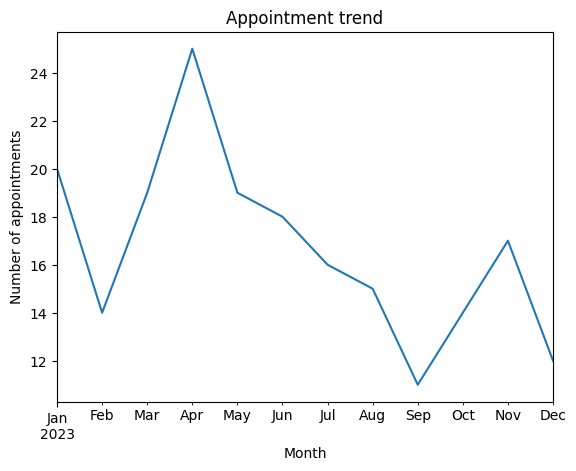

In [ ]:
#Appointment trend
appointments['appointment_month'].value_counts().sort_index().plot(kind='line')
plt.title('Appointment trend')
plt.xlabel('Month')
plt.ylabel('Number of appointments')
plt.show()

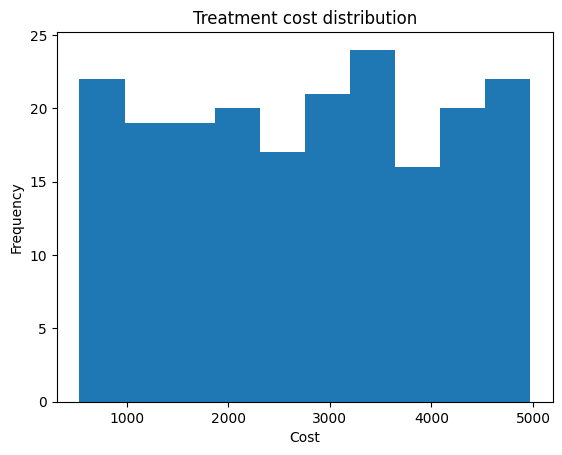

In [ ]:
#Treatment cost distribution
treatments['cost'].plot(kind='hist')
plt.title('Treatment cost distribution')
plt.xlabel('Cost')
plt.show()

**KPI** **Analysis**

In [64]:
# Total revenue
total_revenue = billing["amount"].sum()
print("Total Revenue: $", round(total_revenue, 2))


Total Revenue: $ 551249.85


In [59]:
# Billing analysis
#Revenue by month
billing["bill_date"] = pd.to_datetime(billing["bill_date"])# converting bill_date to datetime()
billing["bill_month"] = billing["bill_date"].dt.to_period("M")


In [61]:
monthly_revenue =(
    billing.groupby("bill_month")["amount"].sum().reset_index().sort_values("bill_month")
)
display(monthly_revenue)

,bill_month,amount
0,2023-01,58701.23
1,2023-02,36669.69
2,2023-03,47304.29
3,2023-04,64271.54
4,2023-05,48791.05
5,2023-06,56887.82
6,2023-07,39880.19
7,2023-08,41958.67
8,2023-09,33426.53
9,2023-10,43314.15


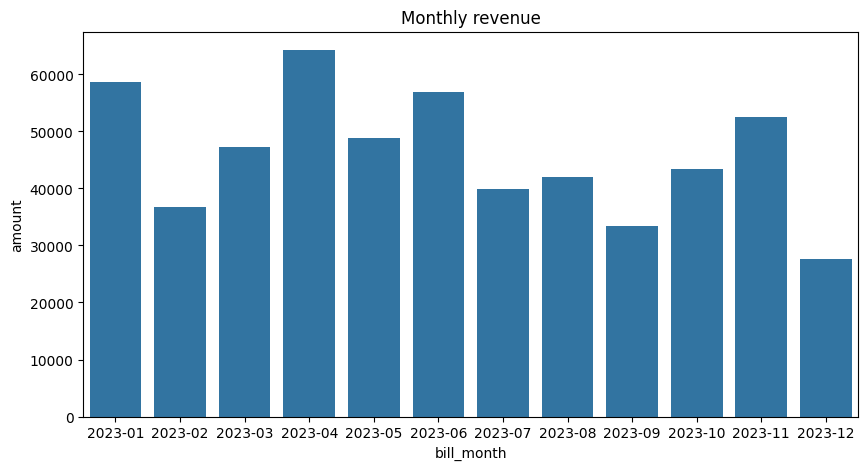

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x="bill_month",y="amount",data=monthly_revenue)
plt.title("Monthly revenue")
plt.show()

In [66]:
#Appointments per month
appointments["appt_month"] = appointments["appointment_date"].dt.to_period("M")
appointments_per_month = appointments["appt_month"].value_counts().sort_index()
appointments_per_month


,count
appt_month,
2023-01,20
2023-02,14
2023-03,19
2023-04,25
2023-05,19
2023-06,18
2023-07,16
2023-08,15
2023-09,11


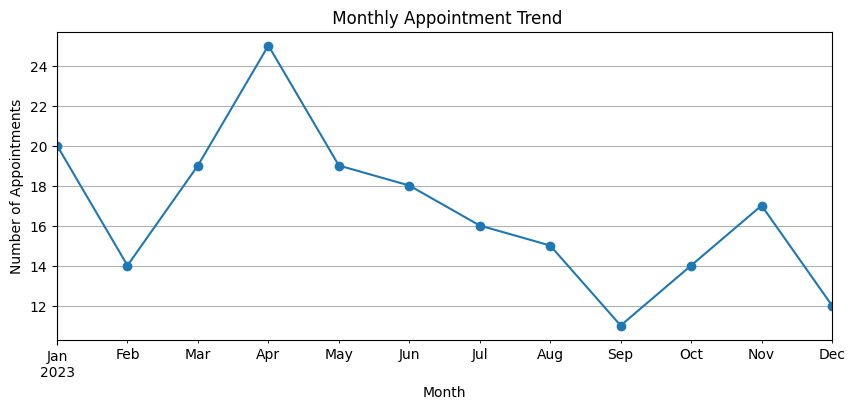

In [67]:
plt.figure(figsize=(10,4))
appointments_per_month.plot(kind='line', marker='o')
plt.title(" Monthly Appointment Trend")
plt.xlabel("Month")
plt.ylabel("Number of Appointments")
plt.grid(True)
plt.show()


In [69]:
#treatment types
treatment_counts = (
    treatments.groupby("treatment_type")["treatment_id"]
    .count()
    .reset_index()
    .rename(columns={"treatment_id": "num_treatments"})
    .sort_values("num_treatments", ascending=False)
)

treatment_counts.head()


,treatment_type,num_treatments
0,Chemotherapy,49
4,X-Ray,41
1,ECG,38
2,MRI,36
3,Physiotherapy,36


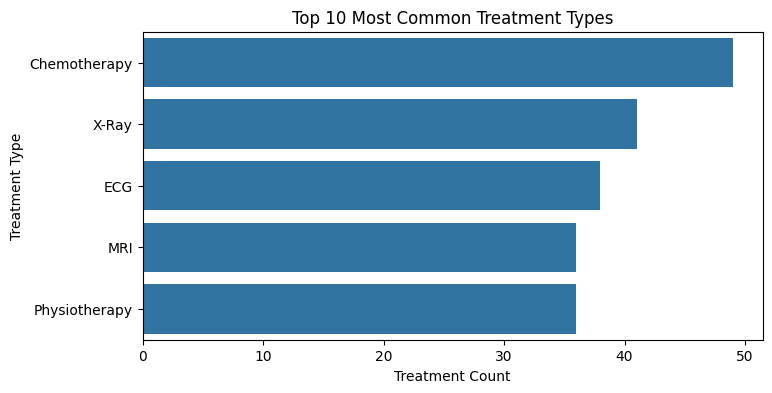

In [70]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=treatment_counts.head(10),
    x="num_treatments",
    y="treatment_type"
)
plt.title("Top 10 Most Common Treatment Types")
plt.xlabel("Treatment Count")
plt.ylabel("Treatment Type")
plt.show()


**Heat map**

In [71]:
# Convert to datetime if not already
appointments["appointment_time"] = pd.to_datetime(appointments["appointment_time"], errors='coerce')
appointments["appointment_date"] = pd.to_datetime(appointments["appointment_date"], errors='coerce')

# Extract hour
appointments["hour"] = appointments["appointment_time"].dt.hour

# Extract day of week (0=Mon, 6=Sun)
appointments["day_of_week"] = appointments["appointment_date"].dt.dayofweek
appointments["day_name"] = appointments["appointment_date"].dt.day_name()


/tmp/ipython-input-84260718.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  appointments["appointment_time"] = pd.to_datetime(appointments["appointment_time"], errors='coerce')


In [72]:
heatmap_data = appointments.pivot_table(
    index="day_name",
    columns="hour",
    values="appointment_id",
    aggfunc="count"
)



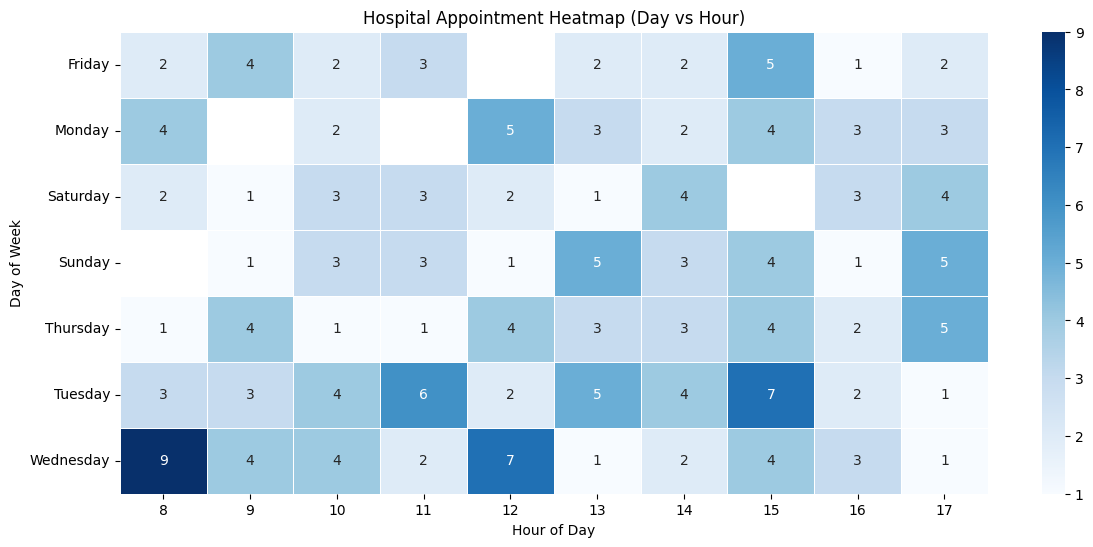

In [73]:

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="Blues", linewidths=0.5, annot=True, fmt="g")
plt.title("Hospital Appointment Heatmap (Day vs Hour)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()
